### Word Cloud 만들기
## 절차
* csv 파일 열기
* postive, negative 문장 분류
* 문장을 토큰화(영어 단어, 불용어 제거, 트위터 태그 '@이름' 제거)
* 토큰 리스트 평탄화 이후 word cloud 생성

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# NLTK의 기본 데이터 다운로드
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# 데이터셋 불러오기 (csv 파일 경로를 지정)
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin1')

# 데이터프레임 컬럼 명 설정
df.columns = ['target', 'id', 'timestamp', 'flag', 'user', 'text']

# 긍정 및 부정 트윗 필터링
positive_tweets = df[df['target'] == 4]['text']
negative_tweets = df[df['target'] == 0]['text']

# 불용어 설정 및 텍스트 전처리 함수 정의
stop_words = set(stopwords.words('english'))

In [4]:
positive_tweets

799999          I LOVE @Health4UandPets u guys r the best!! 
800000     im meeting up with one of my besties tonight! ...
800001     @DaRealSunisaKim Thanks for the Twitter add, S...
800002     Being sick can be really cheap when it hurts t...
800003       @LovesBrooklyn2 he has that effect on everyone 
                                 ...                        
1599994    Just woke up. Having no school is the best fee...
1599995    TheWDB.com - Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover? Ask me f...
1599997    Happy 38th Birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 800000, dtype: object

In [5]:
def preprocess(text):
    tokens = word_tokenize(text) # 문장을 단어로 토큰화
    tokens = [word for word in tokens if word.isalpha()]  # 알파벳 문자만 선택
    tokens = [word.lower() for word in tokens]  # 소문자 변환
    tokens = [word for word in tokens if word not in stop_words]  # 불용어 제거
    tokens = [word for word in tokens if not word.startswith('@')]  # '@name' 제거
    return tokens

In [6]:
# 긍정 및 부정 트윗 전처리
positive_tokens = positive_tweets.apply(preprocess)
negative_tokens = negative_tweets.apply(preprocess)

799999

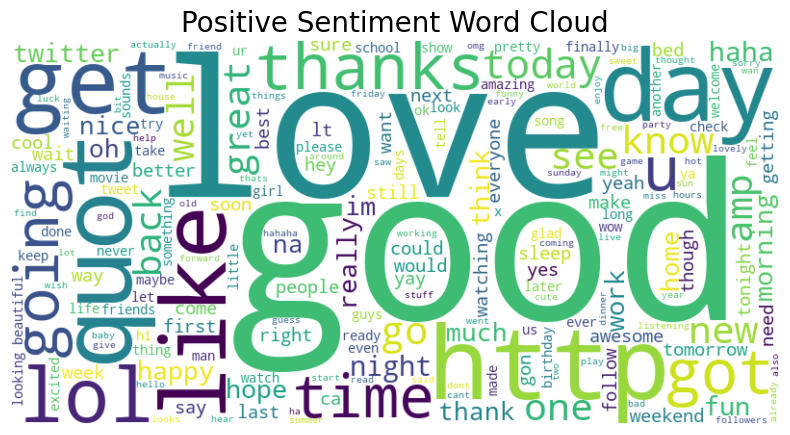

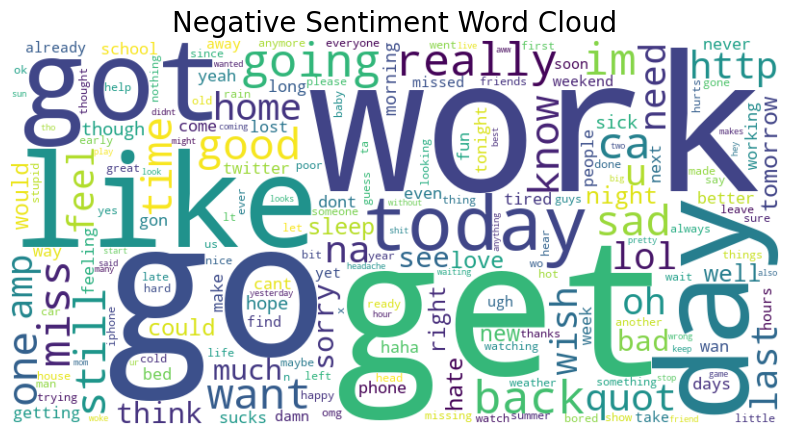

In [8]:
from collections import Counter

# 단어 샘플링 함수
def sample_words(tokens, max_words=200):
    all_words = [word for tokens_list in tokens for word in tokens_list]
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(max_words)
    return dict(most_common_words)

positive_word_freq = sample_words(positive_tokens)
negative_word_freq = sample_words(negative_tokens)

# Word Cloud 생성 함수
def create_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# 긍정 및 부정 감정에 대한 Word Cloud 생성
create_wordcloud(positive_word_freq, 'Positive Sentiment Word Cloud')
create_wordcloud(negative_word_freq, 'Negative Sentiment Word Cloud')

In [9]:
positive_tokens
negative_tokens

0         [upset, ca, update, facebook, texting, might, ...
1         [kenichan, dived, many, times, ball, managed, ...
2                   [whole, body, feels, itchy, like, fire]
3                 [nationwideclass, behaving, mad, ca, see]
4                                   [kwesidei, whole, crew]
                                ...                        
799994        [sick, spending, day, laying, bed, listening]
799995                                              [gmail]
799996                           [rest, peace, farrah, sad]
799997    [sounds, like, rival, flagging, ads, much, tho...
799998    [resit, exams, summer, wishes, worked, harder,...
Name: text, Length: 799999, dtype: object